In [1]:
#!pip install pydot

from IPython.display import SVG
import pydot

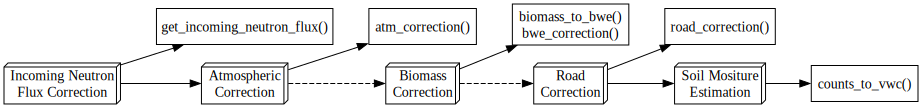

In [3]:
dot_graph = pydot.Dot(graph_type='digraph', rankdir="LR", engine="dot")


### Incoming correction
incomming_corr = pydot.Node('Incoming Neutron\nFlux Correction', group=1)
incomming_corr.set_shape('box3d')
dot_graph.add_node(incomming_corr)

incomming_func = pydot.Node('get_incoming_neutron_flux()')
incomming_func.set_shape('box')
dot_graph.add_node(incomming_func)

iedge = pydot.Edge(incomming_corr,incomming_func)
dot_graph.add_edge(iedge)


#ATM correction
atm_corr = pydot.Node('Atmospheric\nCorrection', group=1)
atm_corr.set_shape('box3d')
dot_graph.add_node(atm_corr)

atm_func = pydot.Node('atm_correction()')
atm_func.set_shape('box')
dot_graph.add_node(atm_func)

iedge = pydot.Edge(atm_corr,atm_func)
dot_graph.add_edge(iedge)


#Biomass correction
bwe_corr = pydot.Node('Biomass\nCorrection', group=1)
bwe_corr.set_shape('box3d')
dot_graph.add_node(bwe_corr)

bwe_func = pydot.Node('biomass_to_bwe()\nbwe_correction()')
bwe_func.set_shape('box')
dot_graph.add_node(bwe_func)

iedge = pydot.Edge(bwe_corr,bwe_func)
dot_graph.add_edge(iedge)

#Road Correction
road_corr = pydot.Node('Road\nCorrection', group=1)
road_corr.set_shape('box3d')
dot_graph.add_node(road_corr)

road_func = pydot.Node('road_correction()')
road_func.set_shape('box')
dot_graph.add_node(road_func)

iedge = pydot.Edge(road_corr,road_func)
dot_graph.add_edge(iedge)

#Soil mositure estiamtion
sme_node = pydot.Node('Soil Mositure\nEstimation', group=1)
sme_node.set_shape('box3d')
dot_graph.add_node(sme_node)

sme_func = pydot.Node('counts_to_vwc()')
sme_func.set_shape('box')
dot_graph.add_node(sme_func)

iedge = pydot.Edge(sme_node,sme_func)
dot_graph.add_edge(iedge)

#Seps arrrows
iedge = pydot.Edge(incomming_corr,atm_corr)
dot_graph.add_edge(iedge)

iedge = pydot.Edge(atm_corr,bwe_corr)
iedge.set_style('dashed')
dot_graph.add_edge(iedge)

iedge = pydot.Edge(bwe_corr,road_corr)
iedge.set_style('dashed')
dot_graph.add_edge(iedge)

iedge = pydot.Edge(road_corr,sme_node)
dot_graph.add_edge(iedge)


dot_graph.write_svg('../workflow.svg')
SVG('../workflow.svg')